# 문제 (해당 과제에 대한 정답은 없습니다)
- (조건 : python 3.x version, pandas 사용, .py 혹은 .ipynb 파일 제출물)
- 데이터 메타데이터 : https://drive.google.com/file/d/1CVqelBymwQvTJMhsQTzkths4TSnokAho/view

**Q1. 데이터 타입별 시각화 (자유양식)**

    ◦ 전체기간 카테고리->채널->비디오 개수
    ◦ 월별 카테고리->채널->비디오 개수
    ◦ 월별 TOP10 채널 (분류 기준은 비디오 개수)
    ◦ 주별 TOP5 채널 (분류 기준은 비디오 개수)
    ◦ 월별 카테고리별 태그 키워드 순위
    
**Q2. 새로운 지표를 개발**

- 각각의 비디오는 시청자의 호응도(engagement)를 판단할수 있는 객관적인 지표들이있음
`ex) views, likes, dislikes, comments,...`
- 비디오를 인기 동영상 기준에 부합하도록 분류하고 이 지표를 사용하여 engagement 와 어떤 상관관계가 있는지 설명하시오.

**Q3. Q1, Q2의 답을 자유양식으로 작성 후 `PDF`로 변환하여 첨부**
(영어로 작성 선호하지만 선택 사항임)

## Q1. 데이터 타입별 시각화

### 전처리

In [ ]:
# import liabrary
from matplotlib import rcParams
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# 한글
import matplotlib.font_manager as fm
from matplotlib import font_manager, rc

font_path = 'C:\\Windows\\Fonts\\NanumBarunGothic.ttf'
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

In [ ]:
df = pd.read_csv('../wanted/pretest_data.csv')
df.head()

,video_id,channel_id,published_date,category_name,duration,tags,description,on_trending_date,off_trending_date,on_rank,...,on_dislikes,off_dislikes,on_comments,off_comments,on_channel_subscribers,off_channel_subscribers,on_channel_total_views,off_channel_total_views,on_channel_total_videos,off_channel_total_videos
0,V-0db,CH49ta0,2021-07-01,Entertainment,PT8M20S,SiriusXM|Sirius XM|Sirius|SXM|BIGHIT|빅히트|방탄소년단...,BTS performs their hit songs ‘Dynamite’ and ‘B...,2021-07-03,2021-07-04,13,...,792,1014,10373,10720,1080000,1080000,685992413,687485021,5947,5950
1,V-1XL,CHZVD--,2021-06-24,Entertainment,PT9M17S,치킨불냉면|치킨|불냉면|냉면,영상에 나오는 캐릭터의 이름은 파도비 입니다. 고양이가 아니라 파란 도깨비입니다. ...,2021-06-26,2021-06-27,28,...,121,154,1083,1173,627000,628000,75327083,75685030,70,70
2,V-4fa,CH9w-h_,2021-07-17,Entertainment,PT7M39S,NaN,"거세 구형, 성 충동 제거를 위한 엄벌 치료 VS 인권 보호해야고민 끝에 내린 강요...",2021-07-19,2021-07-22,1,...,162,233,696,1006,5750000,5750000,5424167911,5431617741,34270,34341
3,V-5ip,CHUQVGX,2021-06-02,Sports,PT6M40S,News Network|SBS SPORTSMUG|SPORTSMUG|스포츠머그|축구|...,세계 최초 9회 연속 올림픽 본선 진출! 그동안 한국 축구의 역사를 써내려 간 올림...,2021-06-04,2021-06-04,18,...,30,30,416,416,94200,94200,71160125,71160125,224,224
4,V-5jn,CHhI3EX,2021-07-06,Sports,PT11M27S,이천수|심판도전기|축구심판,찾아 뵐 심판분들이 이제 18명정도 남았네요,2021-07-08,2021-07-09,11,...,112,143,687,772,47600,49200,6993451,7607123,21,21


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   video_id                  2644 non-null   object
 1   channel_id                2644 non-null   object
 2   published_date            2644 non-null   object
 3   category_name             2644 non-null   object
 4   duration                  2644 non-null   object
 5   tags                      2274 non-null   object
 6   description               2604 non-null   object
 7   on_trending_date          2644 non-null   object
 8   off_trending_date         2644 non-null   object
 9   on_rank                   2644 non-null   int64 
 10  off_rank                  2644 non-null   int64 
 11  on_views                  2644 non-null   int64 
 12  off_views                 2644 non-null   int64 
 13  on_likes                  2644 non-null   int64 
 14  off_likes               

In [ ]:
# 결측치 확인
df.isnull().sum()

video_id                      0
channel_id                    0
published_date                0
category_name                 0
duration                      0
tags                        370
description                  40
on_trending_date              0
off_trending_date             0
on_rank                       0
off_rank                      0
on_views                      0
off_views                     0
on_likes                      0
off_likes                     0
on_dislikes                   0
off_dislikes                  0
on_comments                   0
off_comments                  0
on_channel_subscribers        0
off_channel_subscribers       0
on_channel_total_views        0
off_channel_total_views       0
on_channel_total_videos       0
off_channel_total_videos      0
dtype: int64

In [ ]:
df.loc[df['tags'].isna()].head(3)

,video_id,channel_id,published_date,category_name,duration,tags,description,on_trending_date,off_trending_date,on_rank,...,on_dislikes,off_dislikes,on_comments,off_comments,on_channel_subscribers,off_channel_subscribers,on_channel_total_views,off_channel_total_views,on_channel_total_videos,off_channel_total_videos
2,V-4fa,CH9w-h_,2021-07-17,Entertainment,PT7M39S,NaN,"거세 구형, 성 충동 제거를 위한 엄벌 치료 VS 인권 보호해야고민 끝에 내린 강요...",2021-07-19,2021-07-22,1,...,162,233,696,1006,5750000,5750000,5424167911,5431617741,34270,34341
9,V-DeS,CHUXYT0,2021-05-15,Entertainment,PT59M18S,NaN,NaN,2021-05-18,2021-05-19,7,...,357,373,3406,3508,172000,215000,83802043,83802043,1193,1195
12,V-Ih5,CHEf_Bc,2021-04-05,Music,PT4M32S,NaN,WENDY's 1st Mini Album Like Water is out!Liste...,2021-04-07,2021-04-09,5,...,5909,7569,99621,111468,26800000,26800000,20271825690,20296384443,3676,3679


In [ ]:
df.loc[df['description'].isna()].tail(4)

,video_id,channel_id,published_date,category_name,duration,tags,description,on_trending_date,off_trending_date,on_rank,...,on_dislikes,off_dislikes,on_comments,off_comments,on_channel_subscribers,off_channel_subscribers,on_channel_total_views,off_channel_total_views,on_channel_total_videos,off_channel_total_videos
2238,VqTuL,CHZwG8g,2021-06-01,People & Blogs,PT8M8S,NaN,NaN,2021-06-03,2021-06-04,40,...,104,149,2066,2399,718000,721000,101578643,102433127,143,143
2246,VqZag,CHRWzK4,2021-05-13,Entertainment,PT29S,NaN,NaN,2021-05-16,2021-05-17,34,...,392,661,170,257,14400,14800,43489029,44760610,72,73
2272,Vr4uE,CHoLQZ4,2021-05-09,People & Blogs,PT11M30S,qna|큐앤에이|먹방|문복희|복희|eatwithboki|boki,NaN,2021-05-11,2021-05-14,5,...,7755,13781,8148,10051,5720000,5750000,1216069560,1224249987,343,346
2493,VwJ3V,CHD2YO_,2021-05-28,Comedy,PT5M12S,랄로|랄튜브|김찬호,NaN,2021-06-01,2021-06-01,39,...,273,273,4582,4582,613000,613000,178123396,178123396,337,337


In [ ]:
# 중복값 확인 
df[df.duplicated()]

,video_id,channel_id,published_date,category_name,duration,tags,description,on_trending_date,off_trending_date,on_rank,...,on_dislikes,off_dislikes,on_comments,off_comments,on_channel_subscribers,off_channel_subscribers,on_channel_total_views,off_channel_total_views,on_channel_total_videos,off_channel_total_videos


- 채널별 비디오 개수
- 월별 채널 비디오 개수
- 월별 top10
- 주별 top5
- 월별 카테고리별 태그 키워드 순위

In [ ]:
# 계산이 가능하도록 날짜, 시간데이터 변환
def todatetime(df):
    df['duration'] = df['duration'].replace("PT", "", regex=True)
    df['published_date'] = df['published_date'].apply(pd.to_datetime)
    df['on_trending_date'] = df['on_trending_date'].apply(pd.to_datetime)
    df['off_trending_date'] = df['off_trending_date'].apply(pd.to_datetime)
    
    return df

In [ ]:
# Q1에 필요한 데이터 추출
df = todatetime(df)

df1 = df.iloc[:,:7]
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   video_id        2644 non-null   object        
 1   channel_id      2644 non-null   object        
 2   published_date  2644 non-null   datetime64[ns]
 3   category_name   2644 non-null   object        
 4   duration        2644 non-null   object        
 5   tags            2274 non-null   object        
 6   description     2604 non-null   object        
dtypes: datetime64[ns](1), object(6)
memory usage: 144.7+ KB


### 그룹화 진행

In [ ]:
# 채널별
group_ch = df1.groupby(df1['channel_id']).count()

# 총채널개수
len(df1['channel_id'].unique())


print(f"총 채널 개수 : {len(df1['channel_id'].unique())}")

총 채널 개수 : 940


<AxesSubplot:ylabel='channel_id'>

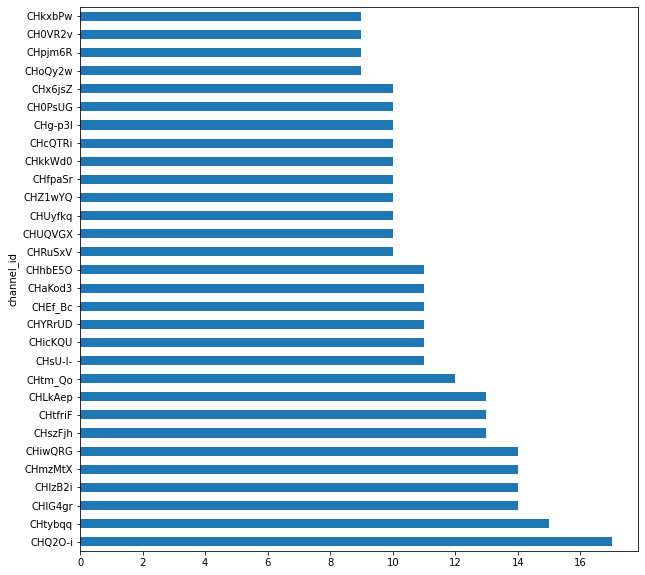

In [ ]:
# 채널로 묶기
sorted_ch = group_ch.sort_values('video_id', ascending=False)[:30]
sorted_ch['video_id'].plot.barh(figsize=(10,10))

<function matplotlib.pyplot.show(close=None, block=None)>

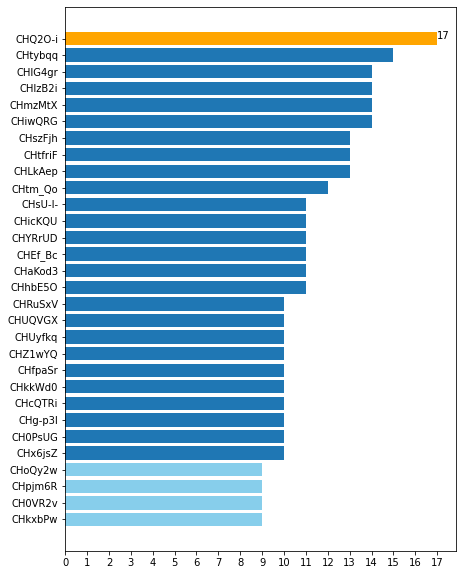

In [ ]:
# 채널별 그래프 정리
x = sorted_ch.index
y = sorted_ch['video_id']


plt.figure(figsize=(7, 10))
plt.xticks(range(20))
plt.barh(x, y)
plt.barh(x[0], y[0], color='orange')
plt.barh(x[-4:], y[-4:], color='skyblue')
plt.gca().invert_yaxis()
plt.text(y[0], x[0] ,str(y[0]), color='black')
plt.show

In [ ]:
bestch = sorted_ch['video_id'].index[0]
df1[df1['channel_id']==bestch]

,video_id,channel_id,published_date,category_name,duration,tags,description
369,V7gJ8,CHQ2O-i,2021-05-14,Entertainment,16M25S,나영석|나PD|아간세|아이슬란드간세끼|이수근|수근세끼|은지원|지원세끼|삼시세끼|세끼...,#출장십오야 #달려라방탄 #고깔고깔 콜라보에 응해주신 달려라 방탄 제작진 여러분들...
618,VDEuV,CHQ2O-i,2021-05-07,Entertainment,21M58S,나영석|나PD|아간세|아이슬란드간세끼|이수근|수근세끼|은지원|지원세끼|삼시세끼|세끼...,#출장십오야 #달려라방탄 #미션공개💜5/4(화) 밤 9시출장십오야 x 달려라방탄 1...
675,VEldQ,CHQ2O-i,2021-04-27,Entertainment,44S,나영석|나PD|아간세|아이슬란드간세끼|이수근|수근세끼|은지원|지원세끼|삼시세끼|세끼...,"#출장십오야 #달려라방탄 #티저투부르면, 달려 갑니다! 세계최초(?) 예능배달서비스..."
892,VJbtQ,CHQ2O-i,2021-05-07,Entertainment,22M11S,나영석|나PD|아간세|아이슬란드간세끼|이수근|수근세끼|은지원|지원세끼|삼시세끼|세끼...,#출장십오야 #달려라방탄 #자네지금뭐하는건가💜5/4(화) 밤 9시출장십오야 x 달려...
906,VJpRv,CHQ2O-i,2021-07-02,Entertainment,14M29S,나영석|나PD|아간세|아이슬란드간세끼|이수근|수근세끼|은지원|지원세끼|삼시세끼|세끼...,#송민호의파일럿 #그림1 #유료광고포함인물퀴즈 사진 제공 : 연합뉴스네 가지 아이템...
980,VLfsx,CHQ2O-i,2021-06-04,Entertainment,21M33S,나영석|나PD|아간세|아이슬란드간세끼|이수근|수근세끼|은지원|지원세끼|삼시세끼|세끼...,"#지금까지감사했습니다 #출장가기좋은계절에돌아오겠습니다 #출장십오야부르면, 달려 갑니..."
1001,VML9E,CHQ2O-i,2021-05-02,Entertainment,26M27S,나영석|나PD|아간세|아이슬란드간세끼|이수근|수근세끼|은지원|지원세끼|삼시세끼|세끼...,"#유료광고포함 #빈센조 #스페셜 부르면, 달려 갑니다!세계최초(?) 예능배달서비스 ..."
1030,VMwA0,CHQ2O-i,2021-05-02,Entertainment,18M53S,나영석|나PD|아간세|아이슬란드간세끼|이수근|수근세끼|은지원|지원세끼|삼시세끼|세끼...,"#빈센조 #스페셜 #고요속의외침부르면, 달려 갑니다!세계최초(?) 예능배달서비스 출..."
1192,VRMiX,CHQ2O-i,2021-05-21,Entertainment,19M3S,나영석|나PD|아간세|아이슬란드간세끼|이수근|수근세끼|은지원|지원세끼|삼시세끼|세끼...,"#게임시작했다 #게임끝났다 #스피드게임아님부르면, 달려 갑니다! 세계최초(?) 예능..."
1371,VW73A,CHQ2O-i,2021-07-02,Entertainment,14M30S,나영석|나PD|아간세|아이슬란드간세끼|이수근|수근세끼|은지원|지원세끼|삼시세끼|세끼...,#송민호의파일럿 #그림2 #작품임수정인물퀴즈 사진 제공 : 연합뉴스네 가지 아이템 ...


<AxesSubplot:ylabel='category_name'>

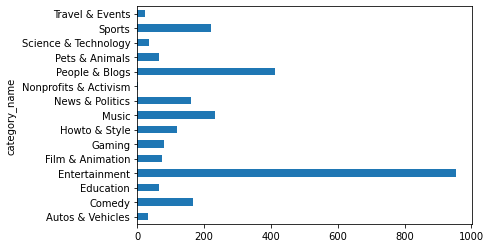

In [ ]:
# 전체기간 카테고리 별 비디오 개수
group_cat = df1.groupby(df1['category_name']).count()
group_cat['video_id'].plot.barh()

In [ ]:
group_cat.sort_values('video_id', ascending=False)

,video_id,channel_id,published_date,duration,tags,description
category_name,,,,,,
Entertainment,954,954,954,954,852,943
People & Blogs,411,411,411,411,285,394
Music,234,234,234,234,201,234
Sports,222,222,222,222,208,221
Comedy,167,167,167,167,147,166
News & Politics,162,162,162,162,150,162
Howto & Style,119,119,119,119,100,119
Gaming,80,80,80,80,70,80
Film & Animation,74,74,74,74,67,74


In [ ]:
print(f"카테고리 개수 : {len(df1['category_name'].unique())}")

카테고리 개수 : 15


In [ ]:
# 전체기간 카데고리 별 비디오 개수

group_cat_ch = df1['video_id'].groupby(by=[df1['category_name'], df1['channel_id']]).count()
group_cat_ch

category_name     channel_id
Autos & Vehicles  CH-IBt8       1
                  CH2xkO7       2
                  CH5f97D       2
                  CHDpnvN       2
                  CHH5U89       2
                               ..
Travel & Events   CHPDdt9       2
                  CHPll9Z       2
                  CHa0aTy       2
                  CHlRNDV       7
                  CHsLoTw       1
Name: video_id, Length: 970, dtype: int64

In [ ]:
group_cat_ch = group_cat_ch.reset_index()
group_cat_ch

,category_name,channel_id,video_id
0,Autos & Vehicles,CH-IBt8,1
1,Autos & Vehicles,CH2xkO7,2
2,Autos & Vehicles,CH5f97D,2
3,Autos & Vehicles,CHDpnvN,2
4,Autos & Vehicles,CHH5U89,2
...,...,...,...
965,Travel & Events,CHPDdt9,2
966,Travel & Events,CHPll9Z,2
967,Travel & Events,CHa0aTy,2
968,Travel & Events,CHlRNDV,7


<Figure size 2160x720 with 0 Axes>

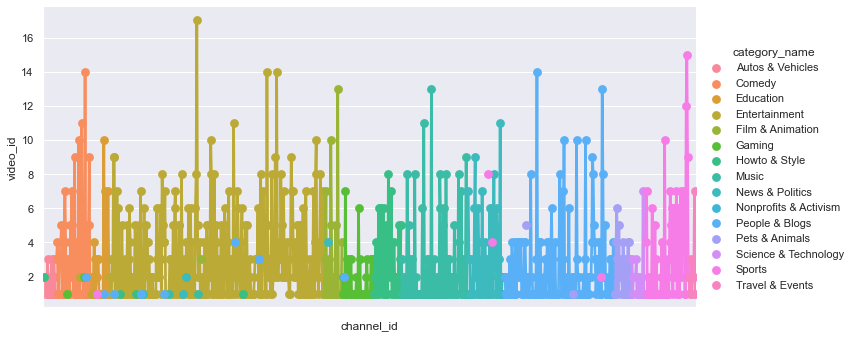

In [ ]:
# 채널과 카테고리시각화
plt.figure(figsize=(30,10))
g1 = sns.catplot(
    data=group_cat_ch, 
    x='channel_id', 
    y='video_id', 
    hue='category_name', 
    kind='point',
    height= 5,
    aspect=2
)
g1.set(xticklabels=[])
plt.show()

In [ ]:
# 총 채널이 940으로 인기동영상이 많은 상위 30개 채널로 분석 진행
popch30 = df1.set_index('channel_id').loc[sorted_ch[:30].index]
group30 = popch30.groupby(['category_name', 'channel_id'])['video_id'].count()
group30

category_name     channel_id
Comedy            CHg-p3l       10
                  CHhbE5O       11
                  CHmzMtX       14
Education         CHicKQU       10
Entertainment     CH0PsUG        9
                  CH0VR2v        9
                  CHQ2O-i       17
                  CHUyfkq       10
                  CHaKod3       11
                  CHiwQRG       14
                  CHkxbPw        9
                  CHlzB2i       14
                  CHpjm6R        9
                  CHx6jsZ       10
Film & Animation  CHRuSxV       10
                  CHszFjh       13
Music             CHEf_Bc       11
                  CHLkAep       13
News & Politics   CHYRrUD        3
                  CHcQTRi        6
                  CHsU-I-       11
People & Blogs    CH0PsUG        1
                  CHIG4gr       14
                  CHZ1wYQ       10
                  CHfpaSr       10
                  CHicKQU        1
                  CHkkWd0       10
                  CHoQy2w 

In [ ]:
popch30.head()

,video_id,published_date,category_name,duration,tags,description
channel_id,,,,,,
CHQ2O-i,V7gJ8,2021-05-14,Entertainment,16M25S,나영석|나PD|아간세|아이슬란드간세끼|이수근|수근세끼|은지원|지원세끼|삼시세끼|세끼...,#출장십오야 #달려라방탄 #고깔고깔 콜라보에 응해주신 달려라 방탄 제작진 여러분들...
CHQ2O-i,VDEuV,2021-05-07,Entertainment,21M58S,나영석|나PD|아간세|아이슬란드간세끼|이수근|수근세끼|은지원|지원세끼|삼시세끼|세끼...,#출장십오야 #달려라방탄 #미션공개💜5/4(화) 밤 9시출장십오야 x 달려라방탄 1...
CHQ2O-i,VEldQ,2021-04-27,Entertainment,44S,나영석|나PD|아간세|아이슬란드간세끼|이수근|수근세끼|은지원|지원세끼|삼시세끼|세끼...,"#출장십오야 #달려라방탄 #티저투부르면, 달려 갑니다! 세계최초(?) 예능배달서비스..."
CHQ2O-i,VJbtQ,2021-05-07,Entertainment,22M11S,나영석|나PD|아간세|아이슬란드간세끼|이수근|수근세끼|은지원|지원세끼|삼시세끼|세끼...,#출장십오야 #달려라방탄 #자네지금뭐하는건가💜5/4(화) 밤 9시출장십오야 x 달려...
CHQ2O-i,VJpRv,2021-07-02,Entertainment,14M29S,나영석|나PD|아간세|아이슬란드간세끼|이수근|수근세끼|은지원|지원세끼|삼시세끼|세끼...,#송민호의파일럿 #그림1 #유료광고포함인물퀴즈 사진 제공 : 연합뉴스네 가지 아이템...


In [ ]:
indexing30 = group30.reset_index()
indexing30.columns=['category_name','channel_id','video_counts']
indexing30.head()

,category_name,channel_id,video_counts
0,Comedy,CHg-p3l,10
1,Comedy,CHhbE5O,11
2,Comedy,CHmzMtX,14
3,Education,CHicKQU,10
4,Entertainment,CH0PsUG,9


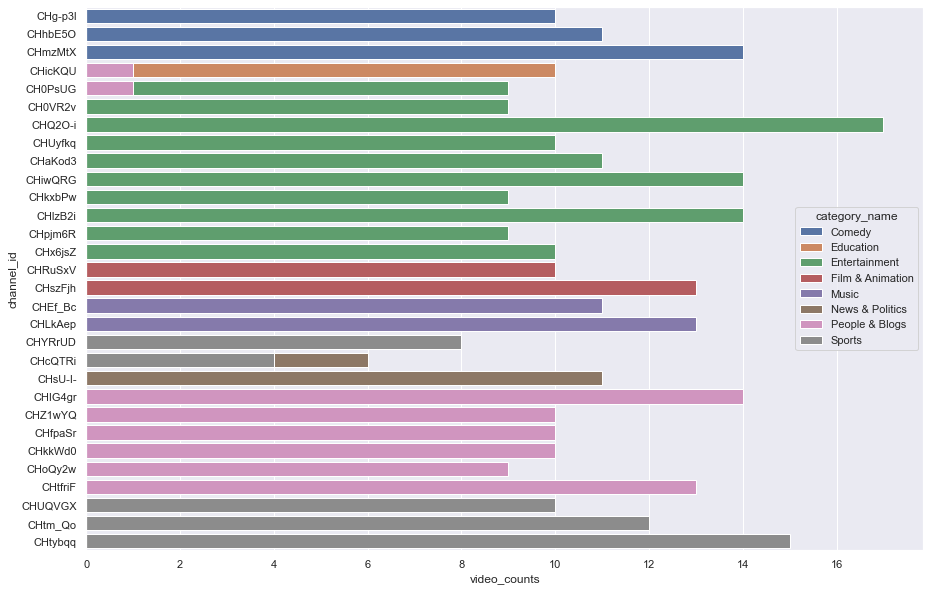

In [ ]:
plt.figure(figsize=(15,10))
sns.barplot(
    data=indexing30, 
    x='video_counts', 
    y='channel_id', 
    hue='category_name',
    dodge=False
)
plt.show()

In [ ]:
# 날짜확인
mind = df1['published_date'].min()
maxd = df1['published_date'].max()

print(f"날짜범위는 {mind} ~ {maxd} 약 {(maxd.month-mind.month)}개월")

날짜범위는 2021-03-25 00:00:00 ~ 2021-07-29 00:00:00 약 4개월


In [ ]:
# month 컬럼생성
df1['month'] = df1['published_date'].dt.month

group_m = df1.groupby(['month', 'category_name']).count()
group_m = group_m['video_id'].reset_index()
group_m.columns=['month','category_name','counts']
group_m.head()

,month,category_name,counts
0,3,Comedy,4
1,3,Education,4
2,3,Entertainment,28
3,3,Film & Animation,2
4,3,Gaming,1


In [ ]:
# 월별 비디오 개수
df1.groupby('month').count()

,video_id,channel_id,published_date,category_name,duration,tags,description
month,,,,,,,
3,74,74,74,74,74,66,73
4,675,675,675,675,675,574,667
5,656,656,656,656,656,564,641
6,655,655,655,655,655,554,647
7,584,584,584,584,584,516,576


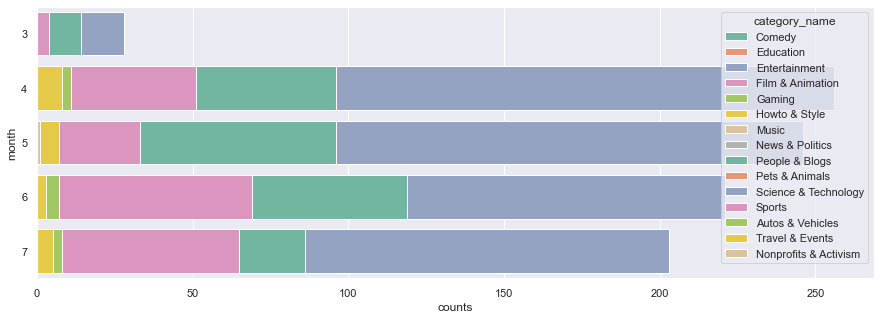

In [ ]:
# 월별 카테고리 비디오개수
plt.figure(figsize=(15,5))
sns.barplot(
    data=group_m, 
    x='counts',
    y='month',
    hue='category_name',
    orient='h',
    dodge=False,
    palette='Set2'
)
plt.show()

In [ ]:
def mk_group(df, con1, con2):
    temp = df.groupby([con1, con2]).count()['video_id'].reset_index()
    temp.columns=[con1, con2, 'counts']
    
    return temp

group_mc = mk_group(df1, 'month', 'channel_id')
group_mc.head()

,month,channel_id,counts
0,3,CH12YJZ,1
1,3,CH2qVOO,1
2,3,CH46BbE,2
3,3,CH4LW3s,1
4,3,CH5BMQO,2


In [ ]:
# 월별 TOP 10채널 
mar10 = group_mc[group_mc['month']==3].sort_values('counts', ascending=False)[:10]
apr10 = group_mc[group_mc['month']==4].sort_values('counts', ascending=False)[:10]
may10 = group_mc[group_mc['month']==5].sort_values('counts', ascending=False)[:10]
jun10 = group_mc[group_mc['month']==6].sort_values('counts', ascending=False)[:10]
jul10 = group_mc[group_mc['month']==7].sort_values('counts', ascending=False)[:10]

In [ ]:
mtop10 = pd.concat([mar10, apr10, may10, jun10, jul10])
mtop10.head()

,month,channel_id,counts
17,3,CHG9aFJ,2
10,3,CH920m3,2
53,3,CHnet0I,2
47,3,CHicKQU,2
43,3,CHaZS_X,2


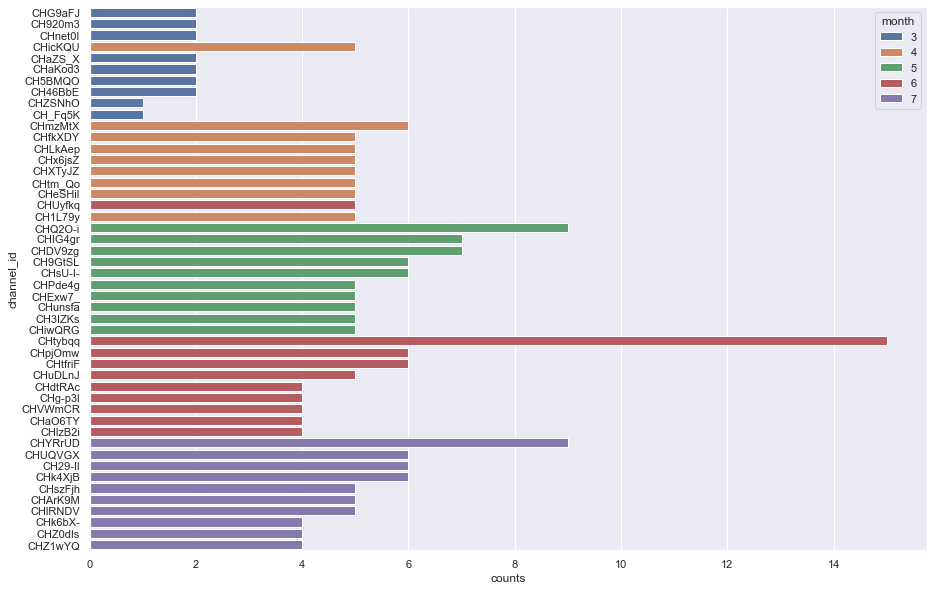

In [ ]:
plt.figure(figsize=(15,10))
sns.barplot(
    data=mtop10, 
    x='counts', 
    y='channel_id', 
    hue='month',
    dodge=False
)
plt.show()

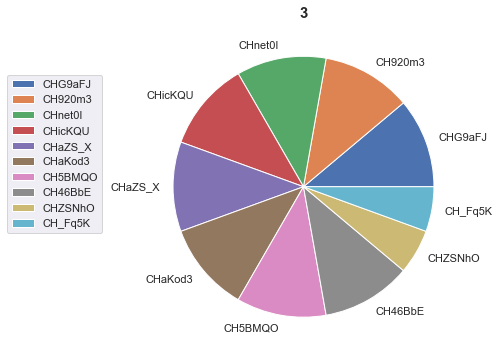

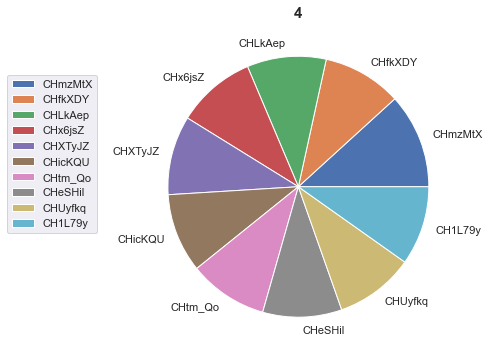

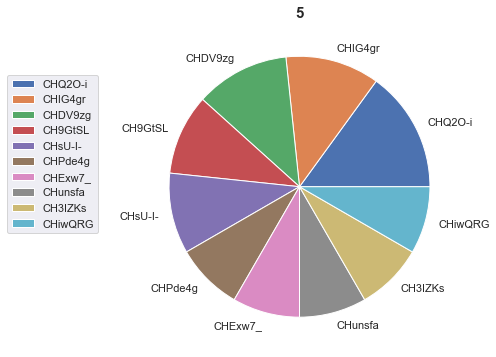

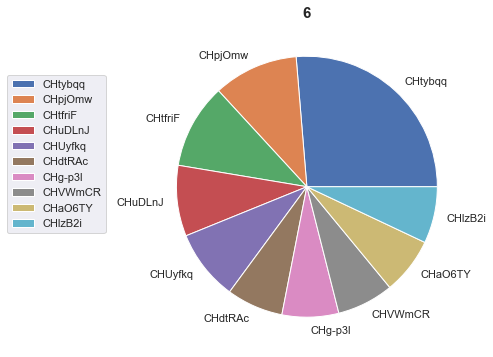

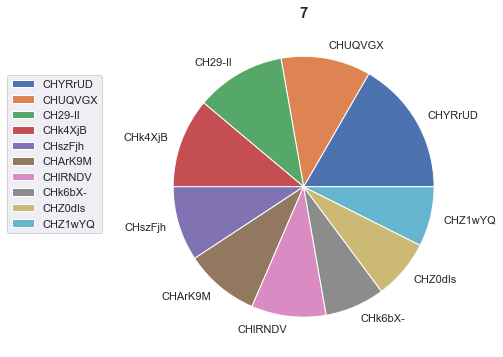

In [ ]:
# pie graph
for month in [mar10, apr10, may10, jun10, jul10]:
    month.set_index('channel_id').plot.pie(y='counts', figsize=(6,6))
    plt.legend(loc='center right',bbox_to_anchor=(-0.1, 0.6) )
    plt.ylabel('')
    plt.title(month['month'].iloc[0], fontsize=15, fontweight='bold')

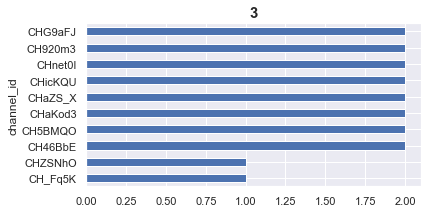

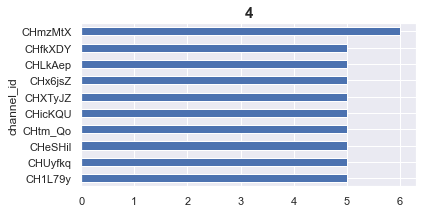

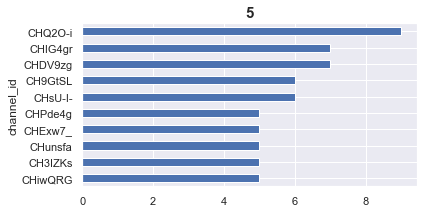

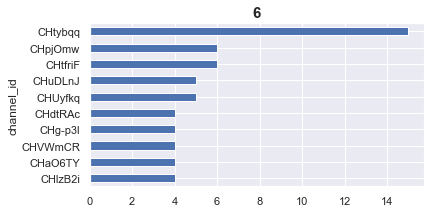

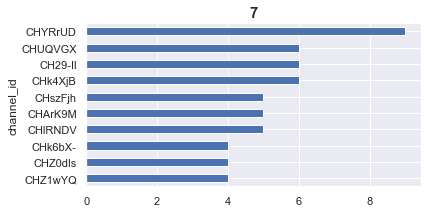

In [ ]:
# bar graph
for month in [mar10, apr10, may10, jun10, jul10]:
    plt.figure(figsize=(6, 3))
    month.set_index('channel_id')['counts'].plot.barh()
    plt.title(month['month'].iloc[0], fontsize=15, fontweight='bold')
    plt.gca().invert_yaxis()
    plt.show()

### Q2. 새로운 지표를 개발

In [ ]:
# 내려갔을 시점(off)으로 단순 views, likes 의 값을 확인
# view high
df.sort_values('off_views', ascending=False)[:10]

,video_id,channel_id,published_date,category_name,duration,tags,description,on_trending_date,off_trending_date,on_rank,...,on_dislikes,off_dislikes,on_comments,off_comments,on_channel_subscribers,off_channel_subscribers,on_channel_total_views,off_channel_total_views,on_channel_total_videos,off_channel_total_videos
1384,VWMwe,CH3IZKs,2021-05-21,Music,3M3S,BIGHIT|빅히트|방탄소년단|BTS|BANGTAN|방탄,BTS (방탄소년단) 'Butter' Official MV Credits: Dire...,2021-05-22,2021-05-29,1,...,13899,133721,4625133,6659938,55800000,56700000,16330550808,16770303209,603,609
603,VCukl,CH3IZKs,2021-07-09,Music,5M,HYBE|HYBE LABELS|하이브|하이브레이블즈,BTS (방탄소년단) 'Permission to Dance' Official MVC...,2021-07-10,2021-07-16,1,...,17720,98147,2125783,2766934,58900000,59400000,17789715503,18072608397,632,632
1417,VXA2Y,CHaO6TY,2021-06-09,Music,3M34S,TWICE|트와이스|taste of love|alcoholfree|alcoholfr...,TWICE Alcohol-Free M/V TWICE The 10th Mini Alb...,2021-06-11,2021-06-15,1,...,32200,55781,649113,885393,20900000,21000000,13064062075,13146142040,1270,1276
1138,VPkKn,CHEf_Bc,2021-05-10,Music,3M32S,NaN,NCT DREAM's 1st album Hot Sauce is out!Listen ...,2021-05-12,2021-05-14,4,...,16466,24120,474730,594860,27200000,27200000,20642481664,20700607504,3691,3691
220,V4TWR,CHEf_Bc,2021-05-17,Music,3M56S,NaN,aespa's new single Next Level is out!Listen an...,2021-05-19,2021-05-22,1,...,37349,58204,218154,258038,27300000,27400000,20738962389,20856492438,3696,3696
1087,VOOMx,CH3IZKs,2021-05-18,Music,24S,BIGHIT|빅히트|방탄소년단|BTS|BANGTAN|방탄,BTS (방탄소년단) 'Butter' Official TeaserBTS (방탄소년단...,2021-05-20,2021-05-23,3,...,24065,51806,1050306,1177067,54700000,56100000,16260826812,16497637589,602,604
2617,VzFT3,CH3IZKs,2021-04-01,Music,3M49S,BIGHIT|빅히트|방탄소년단|BTS|BANGTAN|방탄,BTS (방탄소년단) 'Film out' Official MVSong Credits...,2021-04-03,2021-04-06,3,...,23017,46555,1632895,2004540,53100000,53300000,15357679851,15448610151,546,548
1566,V_yso,CHaO6TY,2021-04-30,Music,3M5S,JYP Entertainment|JYP|ITZY|있지|ITZY Video|ITZY ...,ITZY 마.피.아. In the morning M/Vhttps://orcd.co/...,2021-05-01,2021-05-04,2,...,17512,40759,166847,263310,20500000,20500000,12603301347,12680122815,1261,1261
784,VH12S,CHLkAep,2021-07-23,Music,21S,방탄 챌린지|방탄소년단 챌린지|BTS 챌린지|BTS Challenge|BTS Sho...,Join the 🕺Permission to Dance💃 ChallengeHow to...,2021-07-25,2021-07-28,3,...,37327,82636,47234,69374,54700000,55100000,9045095207,9143593014,1559,1569
135,V2Iko,CHEf_Bc,2021-06-07,Music,3M43S,NaN,EXO's Special Album DON’T FIGHT THE FEELING is...,2021-06-09,2021-06-11,11,...,19971,30594,2091078,2506054,27800000,27900000,21105852572,21148439314,3700,3701


In [ ]:
# row views
df.sort_values('off_views')[:10]

,video_id,channel_id,published_date,category_name,duration,tags,description,on_trending_date,off_trending_date,on_rank,...,on_dislikes,off_dislikes,on_comments,off_comments,on_channel_subscribers,off_channel_subscribers,on_channel_total_views,off_channel_total_views,on_channel_total_videos,off_channel_total_videos
1855,VhAxq,CHdq61m,2021-04-21,Film & Animation,40S,NaN,This year’s annual Earth Day Doodle highlights...,2021-04-23,2021-04-24,24,...,0,0,0,0,1890000,1910000,363982789,407034643,80,80
367,V7d63,CH9gxOp,2021-04-26,People & Blogs,14M56S,아프리카 여행|아프리카여행|에티오피아여행|여행 브이로그|세계여행|세계일주|여행 유튜...,아프리카 최대시장 탐방기복잡하지만 잼있는고⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯...,2021-04-28,2021-04-28,44,...,30,30,345,345,85700,85700,17913749,17913749,373,373
207,V42mo,CHhna8l,2021-06-12,People & Blogs,10M39S,김희재|희재|미스터트롯|미스터 트롯|내일은미스터트롯|미스터트롯top7|미스터트롯탑7...,여덟번째 브희로그생일 축하해주신 모든 분들 너무 감사합니다앞으로도 겸손한 마음으로 ...,2021-06-14,2021-06-14,43,...,68,68,1048,1048,139000,139000,5718102,5718102,32,32
2641,VzygR,CHO4RG1,2021-04-20,Science & Technology,11M45S,아이패드 프로|아이패드 프로5|아이패드 프로 5세대|신형 아이맥|아이맥|iMac|에...,"애플 봄 스페셜 이벤트를 통해서 공개된 아이패드 프로 5세대, 신형 아이맥, 에어태...",2021-04-22,2021-04-22,32,...,46,46,438,438,73100,73100,28123608,28123608,1139,1139
1511,VZZHJ,CHYIxlZ,2021-04-27,Entertainment,21M41S,마리끌레르|MarieClaire|마리끌레르 코리아|marie claire korea...,"#마리끌레르 #싱어게인 #댓글읽기이승윤, 정홍일, 이무진, 이소정이 촬영 전 미리 ...",2021-04-29,2021-04-29,33,...,15,15,2213,2213,81500,81500,21087077,21087077,1904,1904
229,V4_cc,CHe-gh0,2021-05-16,Entertainment,1M48S,JTBC|JTBC라이프|JTBCLIFE|77억의사랑|임영웅|영탁|신동엽|김희철|저글...,갑자기 저글링에 도전하는 임영웅!머야머야 왤케 잘해?!?!#77억의사랑 #임영웅 #...,2021-05-18,2021-05-18,37,...,59,59,333,333,23400,23400,5415259,5415259,4362,4362
552,VBkbD,CHkxvX8,2021-07-01,Howto & Style,7M36S,cook|한식|도시락|가정식|간식|요리|음식|레시피|반찬|맛있는요리|간단요리|쿡방|...,"#깻잎전 #감자전 #쉬운전 #명절전-재료-감자 800g, 천일염 1티스푼, 식초 1...",2021-07-03,2021-07-03,34,...,34,34,47,47,394000,394000,107162164,107162164,1422,1422
1621,Vb3pu,CHRQ7Rw,2021-04-05,Music,7M48S,NaN,#브레이브걸스 #쁘걸 #브브걸 #인터뷰 #쁘야호 #민영 #유나 #은지 #유정 #메보...,2021-04-07,2021-04-07,31,...,14,14,415,415,1350,1350,260453,260453,94,94
1004,VMOyW,CH7cF2Z,2021-05-13,News & Politics,6M46S,한국경제TV 뉴스|이슈플러스|박해린의 뉴스&마켓|이지효의 플러스PICK|뉴스플러스 ...,#한국경제TV뉴스 #비트코인 #가상화폐오늘 크게 출렁인 건 가상화폐 시장도 마찬가지...,2021-05-15,2021-05-15,26,...,26,26,253,253,0,0,3137035,3137035,1493,1493
2027,VlFQB,CHZCH_G,2021-04-05,Entertainment,2M38S,임영웅|진해성|영탁|소유찬|최현상|영일만친구|미스터트롯|미스터트롯2|미스트롯|미스터...,임영웅 진해성 영탁 최현상 소유찬 영텐시절 영상입니다^^,2021-04-07,2021-04-07,26,...,33,33,336,336,30100,30100,12628659,12628659,12689,12689


In [ ]:
# high likes
df.sort_values('off_likes', ascending=False)[:10]

,video_id,channel_id,published_date,category_name,duration,tags,description,on_trending_date,off_trending_date,on_rank,...,on_dislikes,off_dislikes,on_comments,off_comments,on_channel_subscribers,off_channel_subscribers,on_channel_total_views,off_channel_total_views,on_channel_total_videos,off_channel_total_videos
1384,VWMwe,CH3IZKs,2021-05-21,Music,3M3S,BIGHIT|빅히트|방탄소년단|BTS|BANGTAN|방탄,BTS (방탄소년단) 'Butter' Official MV Credits: Dire...,2021-05-22,2021-05-29,1,...,13899,133721,4625133,6659938,55800000,56700000,16330550808,16770303209,603,609
603,VCukl,CH3IZKs,2021-07-09,Music,5M,HYBE|HYBE LABELS|하이브|하이브레이블즈,BTS (방탄소년단) 'Permission to Dance' Official MVC...,2021-07-10,2021-07-16,1,...,17720,98147,2125783,2766934,58900000,59400000,17789715503,18072608397,632,632
2617,VzFT3,CH3IZKs,2021-04-01,Music,3M49S,BIGHIT|빅히트|방탄소년단|BTS|BANGTAN|방탄,BTS (방탄소년단) 'Film out' Official MVSong Credits...,2021-04-03,2021-04-06,3,...,23017,46555,1632895,2004540,53100000,53300000,15357679851,15448610151,546,548
1087,VOOMx,CH3IZKs,2021-05-18,Music,24S,BIGHIT|빅히트|방탄소년단|BTS|BANGTAN|방탄,BTS (방탄소년단) 'Butter' Official TeaserBTS (방탄소년단...,2021-05-20,2021-05-23,3,...,24065,51806,1050306,1177067,54700000,56100000,16260826812,16497637589,602,604
784,VH12S,CHLkAep,2021-07-23,Music,21S,방탄 챌린지|방탄소년단 챌린지|BTS 챌린지|BTS Challenge|BTS Sho...,Join the 🕺Permission to Dance💃 ChallengeHow to...,2021-07-25,2021-07-28,3,...,37327,82636,47234,69374,54700000,55100000,9045095207,9143593014,1559,1569
1460,VYLXf,CH3IZKs,2021-05-28,Music,3M16S,BIGHIT|빅히트|방탄소년단|BTS|BANGTAN|방탄,BTS (방탄소년단) 'Butter' Official MV (Hotter Remix...,2021-05-30,2021-06-02,2,...,22810,31035,301367,318679,56800000,56900000,16822393571,16925404080,610,612
1911,ViLyc,CH3IZKs,2021-07-06,Music,33S,HYBE|HYBE LABELS|하이브|하이브레이블즈|퍼미션투댄스|퍼투댄,BTS (방탄소년단) 'Permission to Dance' Official Tea...,2021-07-08,2021-07-10,1,...,14621,21529,368145,379235,58200000,58900000,17736829776,17789715503,630,632
1267,VT7lh,CHLkAep,2021-05-24,Music,3M28S,방탄소년단|BTS|BANGTAN|HIPHOP|알엠|RM|슈가|SUGA|제이홉|jho...,Connect with BTS: https://ibighit.com/bts http...,2021-05-26,2021-05-30,2,...,20743,29665,185934,200074,50500000,50800000,7920691121,7999727954,1488,1489
135,V2Iko,CHEf_Bc,2021-06-07,Music,3M43S,NaN,EXO's Special Album DON’T FIGHT THE FEELING is...,2021-06-09,2021-06-11,11,...,19971,30594,2091078,2506054,27800000,27900000,21105852572,21148439314,3700,3701
636,VDbXM,CHLkAep,2021-05-30,Music,2M57S,방탄소년단|BTS|BANGTAN|HIPHOP|알엠|RM|슈가|SUGA|제이홉|jho...,"Artist: RM, Jin, SUGA, j-hope, Jimin, V, Jung ...",2021-06-01,2021-06-04,2,...,11233,18521,122855,133687,51000000,51200000,8035317605,8095953797,1491,1497


In [ ]:
# low likes
df.sort_values('off_likes')[:10]

,video_id,channel_id,published_date,category_name,duration,tags,description,on_trending_date,off_trending_date,on_rank,...,on_dislikes,off_dislikes,on_comments,off_comments,on_channel_subscribers,off_channel_subscribers,on_channel_total_views,off_channel_total_views,on_channel_total_videos,off_channel_total_videos
1134,VPg0F,CHbCr1d,2021-07-08,Entertainment,21M3S,모비딕|SBS|mobidic|쇼터뷰|제시의 쇼터뷰|숏터뷰|제시|JESSI|스브스|토...,노래면 노래! 춤이면 춤! 랩이면 랩!다 되는 올라운더 서낳괴 소연이 쇼터뷰에 떴다...,2021-07-10,2021-07-10,30,...,0,0,2568,2568,940000,940000,284017616,284017616,1133,1133
416,V8gXG,CHTOUUd,2021-05-08,Entertainment,6M56S,뉴스|시사|이슈|사회|경제|스토리|사건|사고|부동산|세금|영화|음악|스포츠|인터뷰|...,[이데일리 이상원 김소정 기자] 한강에서 실종돼 닷새 만에 숨진 채 발견된 대학생 ...,2021-05-10,2021-05-12,5,...,0,0,2791,2957,13000,13100,10562416,10726271,1178,1178
856,VIYo5,CHkJ1rb,2021-04-14,Music,3M2S,크래커엔터테인먼트|Cre.ker Entertainment|크래커|Creker|Cre...,✔ More information about THE BOYZhttp://www.th...,2021-04-16,2021-04-16,37,...,0,0,11484,11484,1270000,1270000,131336217,131336217,453,453
59,V0YSb,CHG0Jec,2021-05-05,Entertainment,6M14S,이루리|먹방|리얼사운드|asmr,봐주셔서 감사합니다!#이루리 #머니게임,2021-05-07,2021-05-10,13,...,0,0,10197,18609,382000,380000,104856304,106285717,596,597
379,V806p,CHw1Dsw,2021-06-07,Gaming,13M45S,LCK|LCK Korea|롤챔스|티원|에욱|SNL|2020LCK|LCK썸네일|편집자...,"오랜만에 롤분토론이 대면 토론회로 돌아왔다! 동의한당 동의준(김동준), 이게나당 쓰...",2021-06-09,2021-06-10,12,...,0,0,388,413,609000,612000,425860281,426137379,3401,3414
1352,VV_te,CHw1Dsw,2021-06-08,Gaming,15M9S,LCK|LCK Korea|롤챔스|티원|에욱|SNL|2020LCK|LCK썸네일|편집자...,"오랜만에 롤분토론이 대면 토론회로 돌아왔다! 동의한당 동의준(김동준), 이게나당 쓰...",2021-06-10,2021-06-10,11,...,0,0,416,416,612000,612000,426137379,426137379,3414,3414
1166,VQhUA,CHkJ1rb,2021-05-12,Music,29M37S,크래커엔터테인먼트|Cre.ker Entertainment|크래커|Creker|Cre...,✔ More information about THE BOYZhttp://www.th...,2021-05-14,2021-05-14,36,...,0,0,1671,1671,1340000,1340000,144079265,144079265,458,458
1855,VhAxq,CHdq61m,2021-04-21,Film & Animation,40S,NaN,This year’s annual Earth Day Doodle highlights...,2021-04-23,2021-04-24,24,...,0,0,0,0,1890000,1910000,363982789,407034643,80,80
1484,VYqOB,CHw1Dsw,2021-04-10,Gaming,5M31S,LCK|LCK Korea|롤챔스|티원|에욱|SNL|2020LCK|LCK썸네일|편집자...,#LCK #WeMakeLegends풀경기 및 라이브는 아래 링크에서 확인해주세요.■...,2021-04-12,2021-04-13,21,...,0,0,730,861,619000,619000,405042814,405813309,3183,3183
349,V6uKg,CHbCr1d,2021-05-06,Entertainment,36M23S,모비딕|SBS|mobidic|제시|JESSI|스브스|토크|토크쇼|프롤로그|제시의쇼터...,쇼!터뷰 최초 그룹 완전체 출격 🤍초심 찾으러 하이라이트가 불어왔다!!🌿신인 시절 ...,2021-05-08,2021-05-09,18,...,0,0,3272,3740,843000,844000,258597006,259074019,1068,1069


In [ ]:
# likes 가 0?
df.sort_values('off_likes')[:10][['description', 'off_likes']]

,description,off_likes
1134,노래면 노래! 춤이면 춤! 랩이면 랩!다 되는 올라운더 서낳괴 소연이 쇼터뷰에 떴다...,0
416,[이데일리 이상원 김소정 기자] 한강에서 실종돼 닷새 만에 숨진 채 발견된 대학생 ...,0
856,✔ More information about THE BOYZhttp://www.th...,0
59,봐주셔서 감사합니다!#이루리 #머니게임,0
379,"오랜만에 롤분토론이 대면 토론회로 돌아왔다! 동의한당 동의준(김동준), 이게나당 쓰...",0
1352,"오랜만에 롤분토론이 대면 토론회로 돌아왔다! 동의한당 동의준(김동준), 이게나당 쓰...",0
1166,✔ More information about THE BOYZhttp://www.th...,0
1855,This year’s annual Earth Day Doodle highlights...,0
1484,#LCK #WeMakeLegends풀경기 및 라이브는 아래 링크에서 확인해주세요.■...,0
349,쇼!터뷰 최초 그룹 완전체 출격 🤍초심 찾으러 하이라이트가 불어왔다!!🌿신인 시절 ...,0


In [ ]:
onlist = []
offlist = []
for c in df.columns:
    if 'on' in c:
        onlist.append(c)
    elif 'off' in c:
        offlist.append(c)

onlist, offlist

(['duration',
  'description',
  'on_trending_date',
  'on_rank',
  'on_views',
  'on_likes',
  'on_dislikes',
  'on_comments',
  'on_channel_subscribers',
  'on_channel_total_views',
  'on_channel_total_videos'],
 ['off_trending_date',
  'off_rank',
  'off_views',
  'off_likes',
  'off_dislikes',
  'off_comments',
  'off_channel_subscribers',
  'off_channel_total_views',
  'off_channel_total_videos'])

In [ ]:
on = df[onlist].iloc[:, 2:]
off = df[offlist]

In [ ]:
onoff = pd.DataFrame()
for i in range(len(on.columns)):
    onoff[off.columns[i].replace('off_','')] = off.iloc[:,i]-on.iloc[:,i]

onoff

,trending_date,rank,views,likes,dislikes,comments,channel_subscribers,channel_total_views,channel_total_videos
0,1 days,15,253499,12200,222,347,0,1492608,3
1,1 days,17,81139,1044,33,90,1000,357947,0
2,3 days,22,306005,1690,71,310,0,7449830,71
3,0 days,0,0,0,0,0,0,0,0
4,1 days,18,198079,655,31,85,1600,613672,0
...,...,...,...,...,...,...,...,...,...
2639,3 days,26,827821,786,19194,9363,-10000,2400109,-1
2640,0 days,0,0,0,0,0,0,0,0
2641,0 days,0,0,0,0,0,0,0,0
2642,1 days,10,39654,726,15,51,1000,490848,3


In [ ]:
# 수치들과의 상관관계 (rank는 숫자가 낮을수록 좋은지표임)
onoff.corr()

,rank,views,likes,dislikes,comments,channel_subscribers,channel_total_views,channel_total_videos
rank,1.000000,0.102432,0.053986,0.088112,0.047092,0.101443,0.141920,-0.005122
views,0.102432,1.000000,0.929916,0.946917,0.907935,0.589254,0.890421,0.002278
likes,0.053986,0.929916,1.000000,0.947965,0.902447,0.670656,0.881472,0.001240
dislikes,0.088112,0.946917,0.947965,1.000000,0.874084,0.629604,0.879008,0.001820
comments,0.047092,0.907935,0.902447,0.874084,1.000000,0.504005,0.784532,0.000934
channel_subscribers,0.101443,0.589254,0.670656,0.629604,0.504005,1.000000,0.764240,0.091597
channel_total_views,0.141920,0.890421,0.881472,0.879008,0.784532,0.764240,1.000000,0.099248
channel_total_videos,-0.005122,0.002278,0.001240,0.001820,0.000934,0.091597,0.099248,1.000000


In [ ]:
df2 = pd.concat([df.iloc[:,:4], df.iloc[:,6], onoff], axis=1)
df2.head()

,video_id,channel_id,published_date,category_name,description,trending_date,rank,views,likes,dislikes,comments,channel_subscribers,channel_total_views,channel_total_videos
0,V-0db,CH49ta0,2021-07-01,Entertainment,BTS performs their hit songs ‘Dynamite’ and ‘B...,1 days,15,253499,12200,222,347,0,1492608,3
1,V-1XL,CHZVD--,2021-06-24,Entertainment,영상에 나오는 캐릭터의 이름은 파도비 입니다. 고양이가 아니라 파란 도깨비입니다. ...,1 days,17,81139,1044,33,90,1000,357947,0
2,V-4fa,CH9w-h_,2021-07-17,Entertainment,"거세 구형, 성 충동 제거를 위한 엄벌 치료 VS 인권 보호해야고민 끝에 내린 강요...",3 days,22,306005,1690,71,310,0,7449830,71
3,V-5ip,CHUQVGX,2021-06-02,Sports,세계 최초 9회 연속 올림픽 본선 진출! 그동안 한국 축구의 역사를 써내려 간 올림...,0 days,0,0,0,0,0,0,0,0
4,V-5jn,CHhI3EX,2021-07-06,Sports,찾아 뵐 심판분들이 이제 18명정도 남았네요,1 days,18,198079,655,31,85,1600,613672,0


In [ ]:
df2.sort_values('trending_date', ascending=False)[:20]

,video_id,channel_id,published_date,category_name,description,trending_date,rank,views,likes,dislikes,comments,channel_subscribers,channel_total_views,channel_total_videos
1384,VWMwe,CH3IZKs,2021-05-21,Music,BTS (방탄소년단) 'Butter' Official MV Credits: Dire...,7 days,34,151599599,7662752,119822,2034805,900000,439752401,6
603,VCukl,CH3IZKs,2021-07-09,Music,BTS (방탄소년단) 'Permission to Dance' Official MVC...,6 days,27,90563597,5643420,80427,641151,500000,282892894,0
2487,VwDfq,CHtCiO5,2021-03-31,Music,0:00 하루 끝02:05 금요일에 만나요03:09 너의 의미04:55 스물셋06:...,6 days,49,5355949,150720,1116,9653,30000,12702614,1
2176,VoWyW,CHYyLIl,2021-04-13,Entertainment,국민드라마 '전원일기'에서 일용이 역으로 많은 사랑을 받았던 배우 박은수 씨의 근황...,5 days,46,1318988,8598,516,1086,10000,11109784,278
1572,Va7_J,CHj3_t5,2021-05-12,News & Politics,목격자 친구가 갑자기 물건 챙겨…손정민 옆에 다시 누웠다 (서울=연합뉴스) 한...,5 days,46,1495533,5916,395,2417,6000,18886460,69
2086,VmYxf,CH680xb,2021-04-08,People & Blogs,"- 가격 위치 정보 -Price : KRW 1,500 (USD 1.2)Locatio...",5 days,33,1679338,15477,2129,1090,2840,8753398,-7
2415,Vujf3,CHLkAep,2021-05-25,Music,Connect with BTS: https://ibighit.com/bts http...,5 days,28,19042502,1014339,13565,28128,400000,91100890,2
1923,Vigsd,CHc7een,2021-07-23,People & Blogs,NaN,5 days,25,2806977,31176,2984,2265,5000,5922874,7
1554,V_m6v,CHIG4gr,2021-05-06,People & Blogs,#머니게임 #머니게임5화 #진용진 출연자들에 대한 많은 비난이 쏟아져서댓글...,5 days,28,2391850,12833,1309,7,50000,20987435,2
491,VAZxZ,CHg-p3l,2021-06-30,Comedy,오늘 영상의 한국 음식을 준비해준 @국가비 GabieKook 에게 감사를 전합...,5 days,48,1224076,45345,968,3838,30000,8481882,0


In [ ]:
df2['trending_date'].value_counts()

1 days    878
0 days    739
2 days    603
3 days    292
4 days    108
5 days     21
6 days      2
7 days      1
Name: trending_date, dtype: int64

In [ ]:
df2.sort_values('likes', ascending=False)[:20].iloc[:, 1:6]

,channel_id,published_date,category_name,description,trending_date
1384,CH3IZKs,2021-05-21,Music,BTS (방탄소년단) 'Butter' Official MV Credits: Dire...,7 days
603,CH3IZKs,2021-07-09,Music,BTS (방탄소년단) 'Permission to Dance' Official MVC...,6 days
1087,CH3IZKs,2021-05-18,Music,BTS (방탄소년단) 'Butter' Official TeaserBTS (방탄소년단...,3 days
2617,CH3IZKs,2021-04-01,Music,BTS (방탄소년단) 'Film out' Official MVSong Credits...,3 days
784,CHLkAep,2021-07-23,Music,Join the 🕺Permission to Dance💃 ChallengeHow to...,3 days
1911,CH3IZKs,2021-07-06,Music,BTS (방탄소년단) 'Permission to Dance' Official Tea...,2 days
2415,CHLkAep,2021-05-25,Music,Connect with BTS: https://ibighit.com/bts http...,5 days
1566,CHaO6TY,2021-04-30,Music,ITZY 마.피.아. In the morning M/Vhttps://orcd.co/...,3 days
636,CHLkAep,2021-05-30,Music,"Artist: RM, Jin, SUGA, j-hope, Jimin, V, Jung ...",3 days
1267,CHLkAep,2021-05-24,Music,Connect with BTS: https://ibighit.com/bts http...,4 days


In [ ]:
tc20 = mk_group(df2.sort_values('trending_date', ascending=False)[:20], 'trending_date', 'category_name')
tc50 = mk_group(df2.sort_values('trending_date', ascending=False)[:50], 'trending_date', 'category_name')

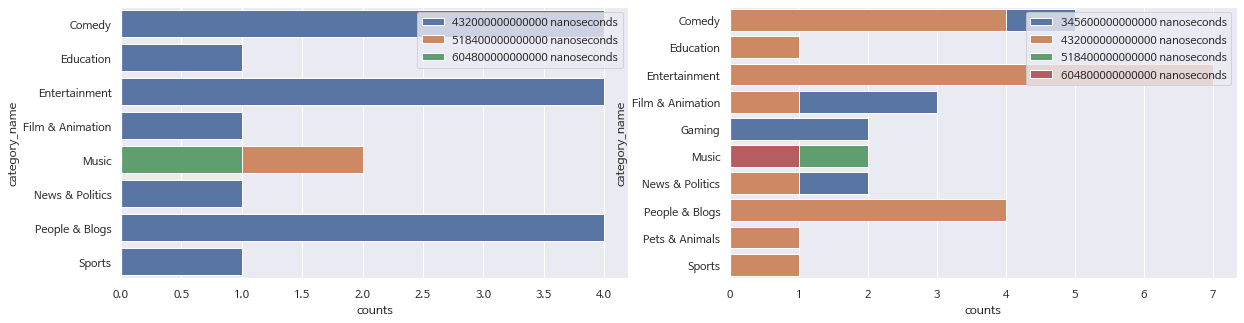

In [ ]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.barplot(
    data=tc20, 
    x='counts', 
    y='category_name', 
    hue='trending_date',
    dodge=False
)
plt.legend(loc='upper right')
plt.title('')

plt.subplot(122)
sns.barplot(
    data=tc50, 
    x='counts', 
    y='category_name', 
    hue='trending_date',
    dodge=False
)
plt.legend(loc='upper right')


In [ ]:
pd.crosstab(df2['category_name'], df2['trending_date'])

trending_date,0 days,1 days,2 days,3 days,4 days,5 days,6 days,7 days
category_name,,,,,,,,
Autos & Vehicles,12,9,6,3,1,0,0,0
Comedy,40,39,38,31,15,4,0,0
Education,16,21,18,6,3,1,0,0
Entertainment,260,315,230,99,43,7,0,0
Film & Animation,16,30,15,7,5,1,0,0
Gaming,21,27,17,11,4,0,0,0
Howto & Style,29,35,34,17,4,0,0,0
Music,72,86,47,20,5,1,2,1
News & Politics,62,44,33,16,6,1,0,0


In [ ]:
pd.crosstab(df1['month'], df2['trending_date'])

trending_date,0 days,1 days,2 days,3 days,4 days,5 days,6 days,7 days
month,,,,,,,,
3,15,22,22,7,6,1,1,0
4,200,245,129,73,21,7,0,0
5,186,208,159,67,31,4,0,1
6,171,244,143,76,16,5,0,0
7,167,159,150,69,34,4,1,0


In [ ]:
df3 = df1.copy()
df3['duration'] = df3['duration'].apply(pd.to_timedelta)

C:\Users\Yesin\anaconda3\envs\alletc\lib\site-packages\pandas\core\tools\timedeltas.py:148: FutureWarning: Units 'M', 'Y' and 'y' do not represent unambiguous timedelta values and will be removed in a future version.
  return _coerce_scalar_to_timedelta_type(arg, unit=unit, errors=errors)


In [ ]:
df3['minute'] = int(df3['duration'].total_seconds()/60)

AttributeError: 'Series' object has no attribute 'total_seconds'

In [ ]:
df3['minute'] = (df3['duration'].dt.total_seconds()/60).apply(int)

In [ ]:
pd.concat([df3['minute'], onoff], axis=1).corr()

,minute,rank,views,likes,dislikes,comments,channel_subscribers,channel_total_views,channel_total_videos
minute,1.000000,0.028666,-0.049627,-0.042387,-0.049582,-0.030354,-0.031613,-0.048529,0.012800
rank,0.028666,1.000000,0.102432,0.053986,0.088112,0.047092,0.101443,0.141920,-0.005122
views,-0.049627,0.102432,1.000000,0.929916,0.946917,0.907935,0.589254,0.890421,0.002278
likes,-0.042387,0.053986,0.929916,1.000000,0.947965,0.902447,0.670656,0.881472,0.001240
dislikes,-0.049582,0.088112,0.946917,0.947965,1.000000,0.874084,0.629604,0.879008,0.001820
comments,-0.030354,0.047092,0.907935,0.902447,0.874084,1.000000,0.504005,0.784532,0.000934
channel_subscribers,-0.031613,0.101443,0.589254,0.670656,0.629604,0.504005,1.000000,0.764240,0.091597
channel_total_views,-0.048529,0.141920,0.890421,0.881472,0.879008,0.784532,0.764240,1.000000,0.099248
channel_total_videos,0.012800,-0.005122,0.002278,0.001240,0.001820,0.000934,0.091597,0.099248,1.000000


In [ ]:
df3['minute'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 2644 entries, 0 to 2643
Series name: minute
Non-Null Count  Dtype
--------------  -----
2644 non-null   int64
dtypes: int64(1)
memory usage: 20.8 KB
